In [1]:
import pandas as pd
import numpy as np
import seaborn as sea

In [65]:
## Read the Recommanded.csv file.
Column= ['User_id','item_id','Rating','timestamp']
Recommended = pd.read_csv("Recommendation System.csv",names=Column)

In [66]:
Recommended.head()

,User_id,item_id,Rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [67]:
## Total records and Columns in Recommeded file
Recommended.shape

(100003, 4)

In [68]:
## Read Another Movie file.
Movie = pd.read_csv('Movie_Id_Titles.csv')

In [7]:
## First 5 record in this movie file 
Movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [121]:
Movie.shape

(1682, 2)

In [8]:
## Checking how many unique item_id in Recommended file
Recommended['item_id'].nunique()

1682

In [9]:
# Checking How many unqiue item_id in Movie file
Movie['item_id'].nunique()

1682

In [10]:
Recommanded.head()

,User_id,item_id,Rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [11]:
Movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [69]:
## In Movie and recommended file 'Item_id' is the common column so merge these file through "item-id" and store into the new object.  
Movie_Recommend = pd.merge(Recommended,Movie,on='item_id')

In [70]:
Movie_Recommend

,User_id,item_id,Rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


# Explorative Data Analysis (EDA)

In [15]:
## After complete the merging file let's do some data analysis task.
## import matplotlib library for data visualization.
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
## Group by the title and see how many total average of rating for each title.
Movie_Recommend.groupby('title')['Rating'].mean().sort_values(ascending = False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: Rating, Length: 1664, dtype: float64

In [18]:
# Group by the title and see how many total counts of rating for each title.
Movie_Recommend.groupby('title')['Rating'].count().sort_values(ascending = False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: Rating, Length: 1664, dtype: int64

In [19]:
## store the total average of rating and total counts of rating for each title and create a datadframe.  
Rating= pd.DataFrame(Movie_Recommend.groupby('title')['Rating'].mean())

In [20]:
Rating

,Rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [22]:
Rating['n_count']= pd.DataFrame(Movie_Recommend.groupby('title')['Rating'].count())

In [23]:
Rating.head()

,Rating,n_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


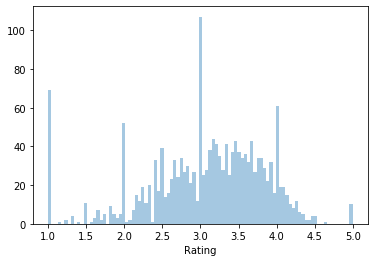

In [71]:
## In this figure user given a maximum rating 3.0.
sea.distplot(Rating['Rating'],bins = 95,kde=False) 

In [73]:
Rating['Rating'].value_counts()

3.000000    101
1.000000     69
2.000000     52
4.000000     41
2.500000     33
           ... 
3.146341      1
3.224138      1
2.853659      1
3.836653      1
3.530000      1
Name: Rating, Length: 896, dtype: int64

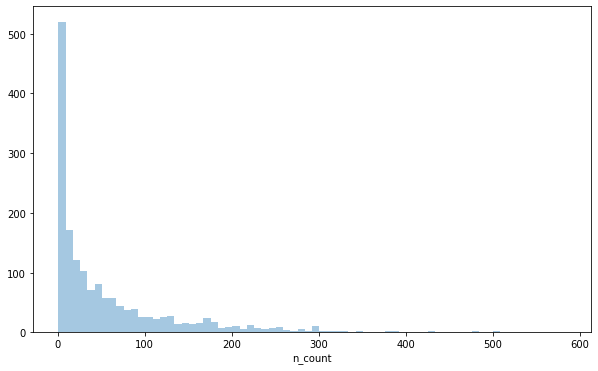

In [92]:
plt.figure(figsize=(10,6))
sea.distplot(Rating['n_count'],bins=70,kde=False) 

In [79]:
Rating.sort_values('n_count',ascending=False)

,Rating,n_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


# Recommending simillar movies

# Making a Pivot table

In [93]:
## Giving some Hyper parameters like index, column and values to undserstand the relation between User_id and title.
## In this pivot table each user give a rating a movie
## NAN value also present in each title, it means some user not gives the rating a movie. 
Pivot_table = pd.pivot_table(index='User_id',columns='title',values='Rating',data=Movie_Recommend)

In [30]:
Pivot_table.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Users give a rating for Star Wars Movie
StarWars = Pivot_table['Star Wars (1977)']

In [91]:
StarWars

User_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [94]:
# Correlation Between StarWars and other movies
After_watch_Starwars_movie  = Pivot_table.corrwith(StarWars)

C:\Users\kevin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\kevin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [95]:
After_watch_Starwars_movie.sort_values(ascending  = False)

title
No Escape (1994)                           1.0
Man of the Year (1995)                     1.0
Hollow Reed (1996)                         1.0
Commandments (1997)                        1.0
Cosi (1996)                                1.0
                                          ... 
Wonderland (1997)                          NaN
Wooden Man's Bride, The (Wu Kui) (1994)    NaN
Yankee Zulu (1994)                         NaN
You So Crazy (1994)                        NaN
Á köldum klaka (Cold Fever) (1994)         NaN
Length: 1664, dtype: float64

In [96]:
# Each Movie name with its correlate between Star Wars Movie
Correlation_with_StarsWar =  pd.DataFrame(After_watch_Starwars_movie,columns=['Correlation'])

In [97]:
Correlation_with_StarsWar.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [98]:
#Check any null values are present in the dataframe
Correlation_with_StarsWar.isnull().sum()

Correlation    254
dtype: int64

In [99]:
#Remove all the NA values in the dataframe
Correlation_with_StarsWar.dropna(inplace=True)

In [100]:
#Check which Movies has a Highest Correlation with StarWar Movie
Correlation_with_StarsWar.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [39]:
# Now use joinfunction Which Movies have Received total numbers of rating.
Correlation_with_StarsWar = Correlation_with_StarsWar.join(Rating['n_count'])

In [40]:
Correlation_with_StarsWar.head()

,Correlation,n_count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [42]:
# After watching the star war movie I should watching only those movies,
# which make a highest correlation with Star Wars movie and the number of rating is greater than 100.
Correlation_with_StarsWar[Correlation_with_StarsWar['n_count']>100].sort_values('Correlation',ascending = False).head(10)

,Correlation,n_count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [43]:
# Second Example Return of jedi movie.
Return_Of_jedi = Pivot_table['Return of the Jedi (1983)']

In [101]:
# Correlation Between Return of jedi and other movies
After_watch_Return_of_jedi = Pivot_table.corrwith(Return_Of_jedi)

C:\Users\kevin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\kevin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [102]:
After_watch_Return_of_jedi.head()

title
'Til There Was You (1997)    1.000000
1-900 (1994)                -0.828079
101 Dalmatians (1996)        0.165659
12 Angry Men (1957)         -0.026169
187 (1997)                   0.064155
dtype: float64

In [103]:
Correlation_Return_of_jedi = pd.DataFrame(After_watch_Return_of_jedi,columns=['Correlation'])

In [104]:
Correlation_Return_of_jedi.head()

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-0.828079
101 Dalmatians (1996),0.165659
12 Angry Men (1957),-0.026169
187 (1997),0.064155


In [105]:
# Now use joinfunction Which Movies have Received total numbers of rating.
Correlation_Return_of_jedi = Correlation_Return_of_jedi.join(Rating['n_count'])

In [106]:
# Checking how many NA values are present in Correlation_Return_of_jedi dataframe
Correlation_Return_of_jedi.isnull().sum()

Correlation    249
n_count          0
dtype: int64

In [107]:
#Remove all the NA values in the dataframe
Correlation_Return_of_jedi.dropna(inplace = True)

In [108]:
Correlation_Return_of_jedi.sort_values('n_count',ascending = False).head(10)

,Correlation,n_count
title,,
Star Wars (1977),0.672556,584
Contact (1997),0.170039,509
Fargo (1996),0.078676,508
Return of the Jedi (1983),1.000000,507
Liar Liar (1997),0.227837,485
"English Patient, The (1996)",0.017599,481
Scream (1996),0.113641,478
Toy Story (1995),0.187092,452
Air Force One (1997),0.148786,431


In [52]:
# After watching the Return of jedi movie I should watching only those movies,
# which make a highest correlation with Return of jedi movie and the number of rating is greater than 100.
Correlation_Return_of_jedi[Correlation_Return_of_jedi['n_count']>100].sort_values('Correlation',ascending = False).head(10)

,Correlation,n_count
title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368
Star Wars (1977),0.672556,584
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
Sneakers (1992),0.412559,150
Back to the Future (1985),0.411901,350
"Frighteners, The (1996)",0.391322,115
True Lies (1994),0.364536,208


In [109]:
# Third Example _20000_Leagues_Under the Sea movie
_20000_Leagues_UndertheSea = Pivot_table['20,000 Leagues Under the Sea (1954)']

In [110]:
_20000_Leagues_UndertheSea.head()

User_id
0    NaN
1    3.0
2    NaN
3    NaN
4    NaN
Name: 20,000 Leagues Under the Sea (1954), dtype: float64

In [111]:
# Correlation Between 20,000 Leagues Under the Sea (1954) and other movies
Correlation_with_20000_Leagues = Pivot_table.corrwith(_20000_Leagues_UndertheSea)

In [112]:
Correlation_20000_leagues= pd.DataFrame(Correlation_with_20000Leagues,columns=['Correlation'])

In [113]:
Correlation_20000_leagues.head()

,Correlation
title,
'Til There Was You (1997),NaN
1-900 (1994),NaN
101 Dalmatians (1996),0.266928
12 Angry Men (1957),0.274772
187 (1997),NaN


In [114]:
# Now use joinfunction, Which Movies have Received total numbers of rating.
Correlation_20000_leagues = Correlation_20000_leagues.join(Rating['n_count'])

In [115]:
Correlation_20000_leagues.head()

,Correlation,n_count
title,,
'Til There Was You (1997),NaN,9
1-900 (1994),NaN,5
101 Dalmatians (1996),0.266928,109
12 Angry Men (1957),0.274772,125
187 (1997),NaN,41


In [116]:
Correlation_20000_leagues.shape

(1664, 2)

In [117]:
# Checking how many NA values are present in Correlation_Return_of_jedi dataframe
Correlation_20000_leagues.isnull().sum()

Correlation    539
n_count          0
dtype: int64

In [118]:
# Remove all the NA values in Correlation_20000_leagues dataframe.
Correlation_20000_leagues.dropna(inplace = True)

In [120]:
# After watching the 20,000 Leagues Under the Sea (1954) movie I should watching only those movies,
# which make a highest correlation with 20,000 Leagues Under the Sea (1954) movie and the number of rating is greater than 100.
Correlation_20000_leagues[Correlation_20000_leagues['n_count']>100].sort_values('Correlation',ascending = False).head(10)

,Correlation,n_count
title,,
Scream 2 (1997),0.811093,106
True Romance (1993),0.697741,104
Ben-Hur (1959),0.637665,124
Kiss the Girls (1997),0.559017,143
Seven Years in Tibet (1997),0.553470,155
"Hudsucker Proxy, The (1994)",0.550132,110
"Wrong Trousers, The (1993)",0.548083,118
Highlander (1986),0.545090,153
Crash (1996),0.519701,128
